# Filter `wer201` sine/cosine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
inp = {'r': np.logspace(0, 10, 1000),
       'r_def': (1, 1, 2),
       'n': 201,
       'name': 'wer_201_CosSin_2018',
       'full_output': True,
       'fI': (epm.fdesign.sin_1(), epm.fdesign.cos_1())}

## 1. Rough overview over a wide range

   brute fct calls : 100    

   Filter length   : 201
   Best filter
   > Min field     : 2.13419e-14
   > Spacing       : 0.07333333333
   > Shift         : -1.333333333
   > Base min/max  : 1.722323e-04 / 4.034288e+02

:: empymod END; runtime = 0:00:03.169379 :: 

* QC: Overview of brute-force inversion:


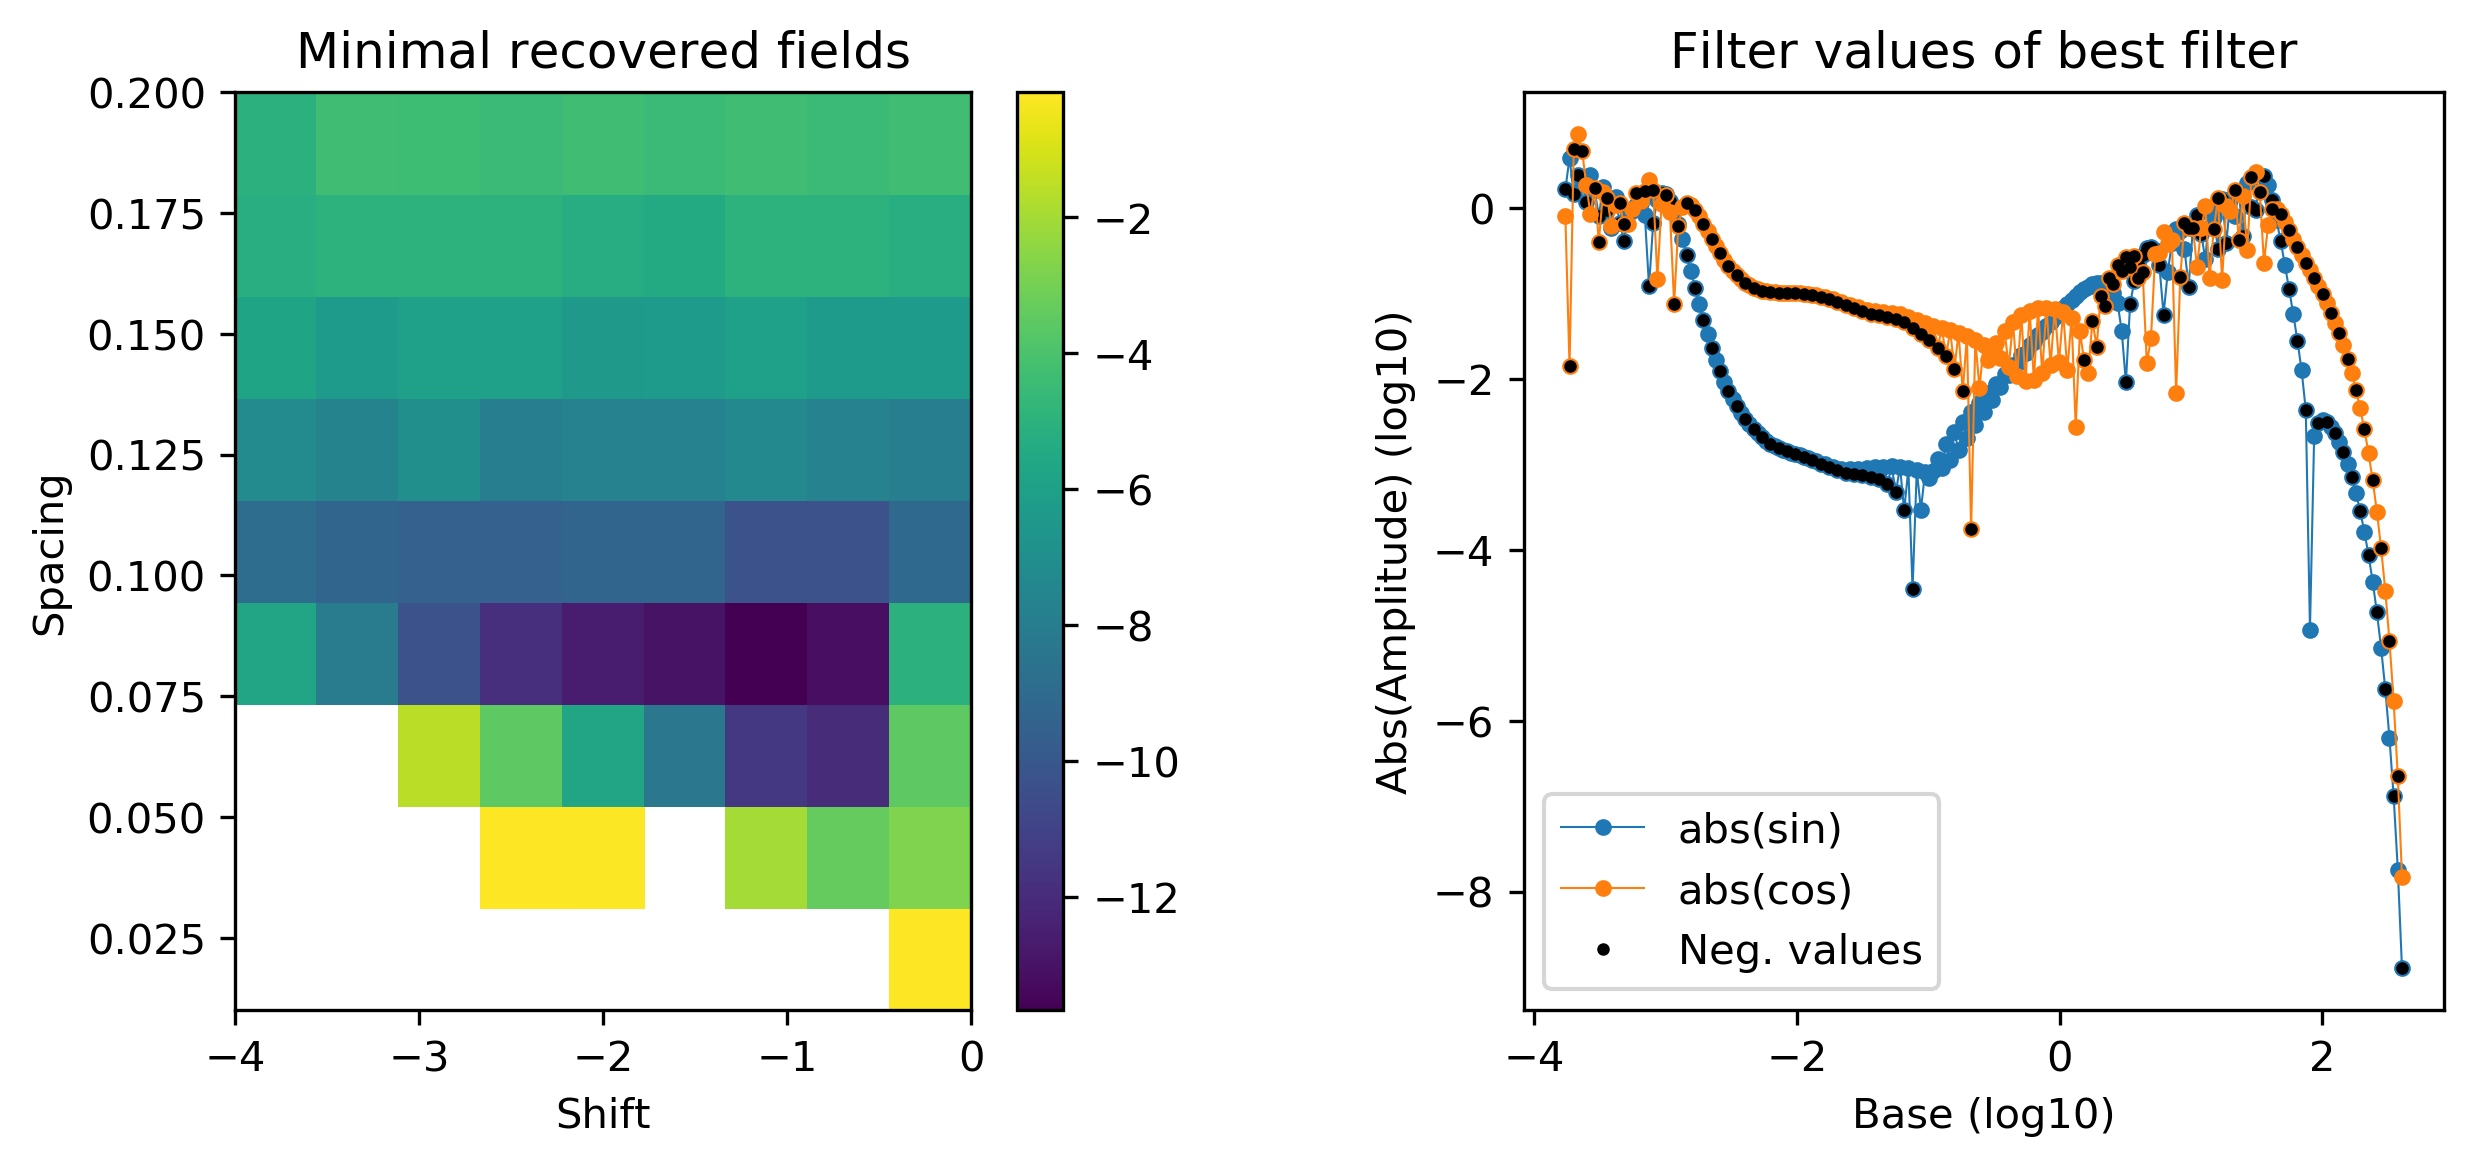

In [4]:
filt1, out1 = epm.fdesign.design(spacing=(0.01, 0.2, 10), shift=(-4, 0, 10), save=False, **inp)

## 2. First focus

   brute fct calls : 100    

   Filter length   : 201
   Best filter
   > Min field     : 4.51046e-15
   > Spacing       : 0.06
   > Shift         : -1.055555556
   > Base min/max  : 8.626034e-04 / 1.403928e+02

:: empymod END; runtime = 0:00:02.408310 :: 

* QC: Overview of brute-force inversion:


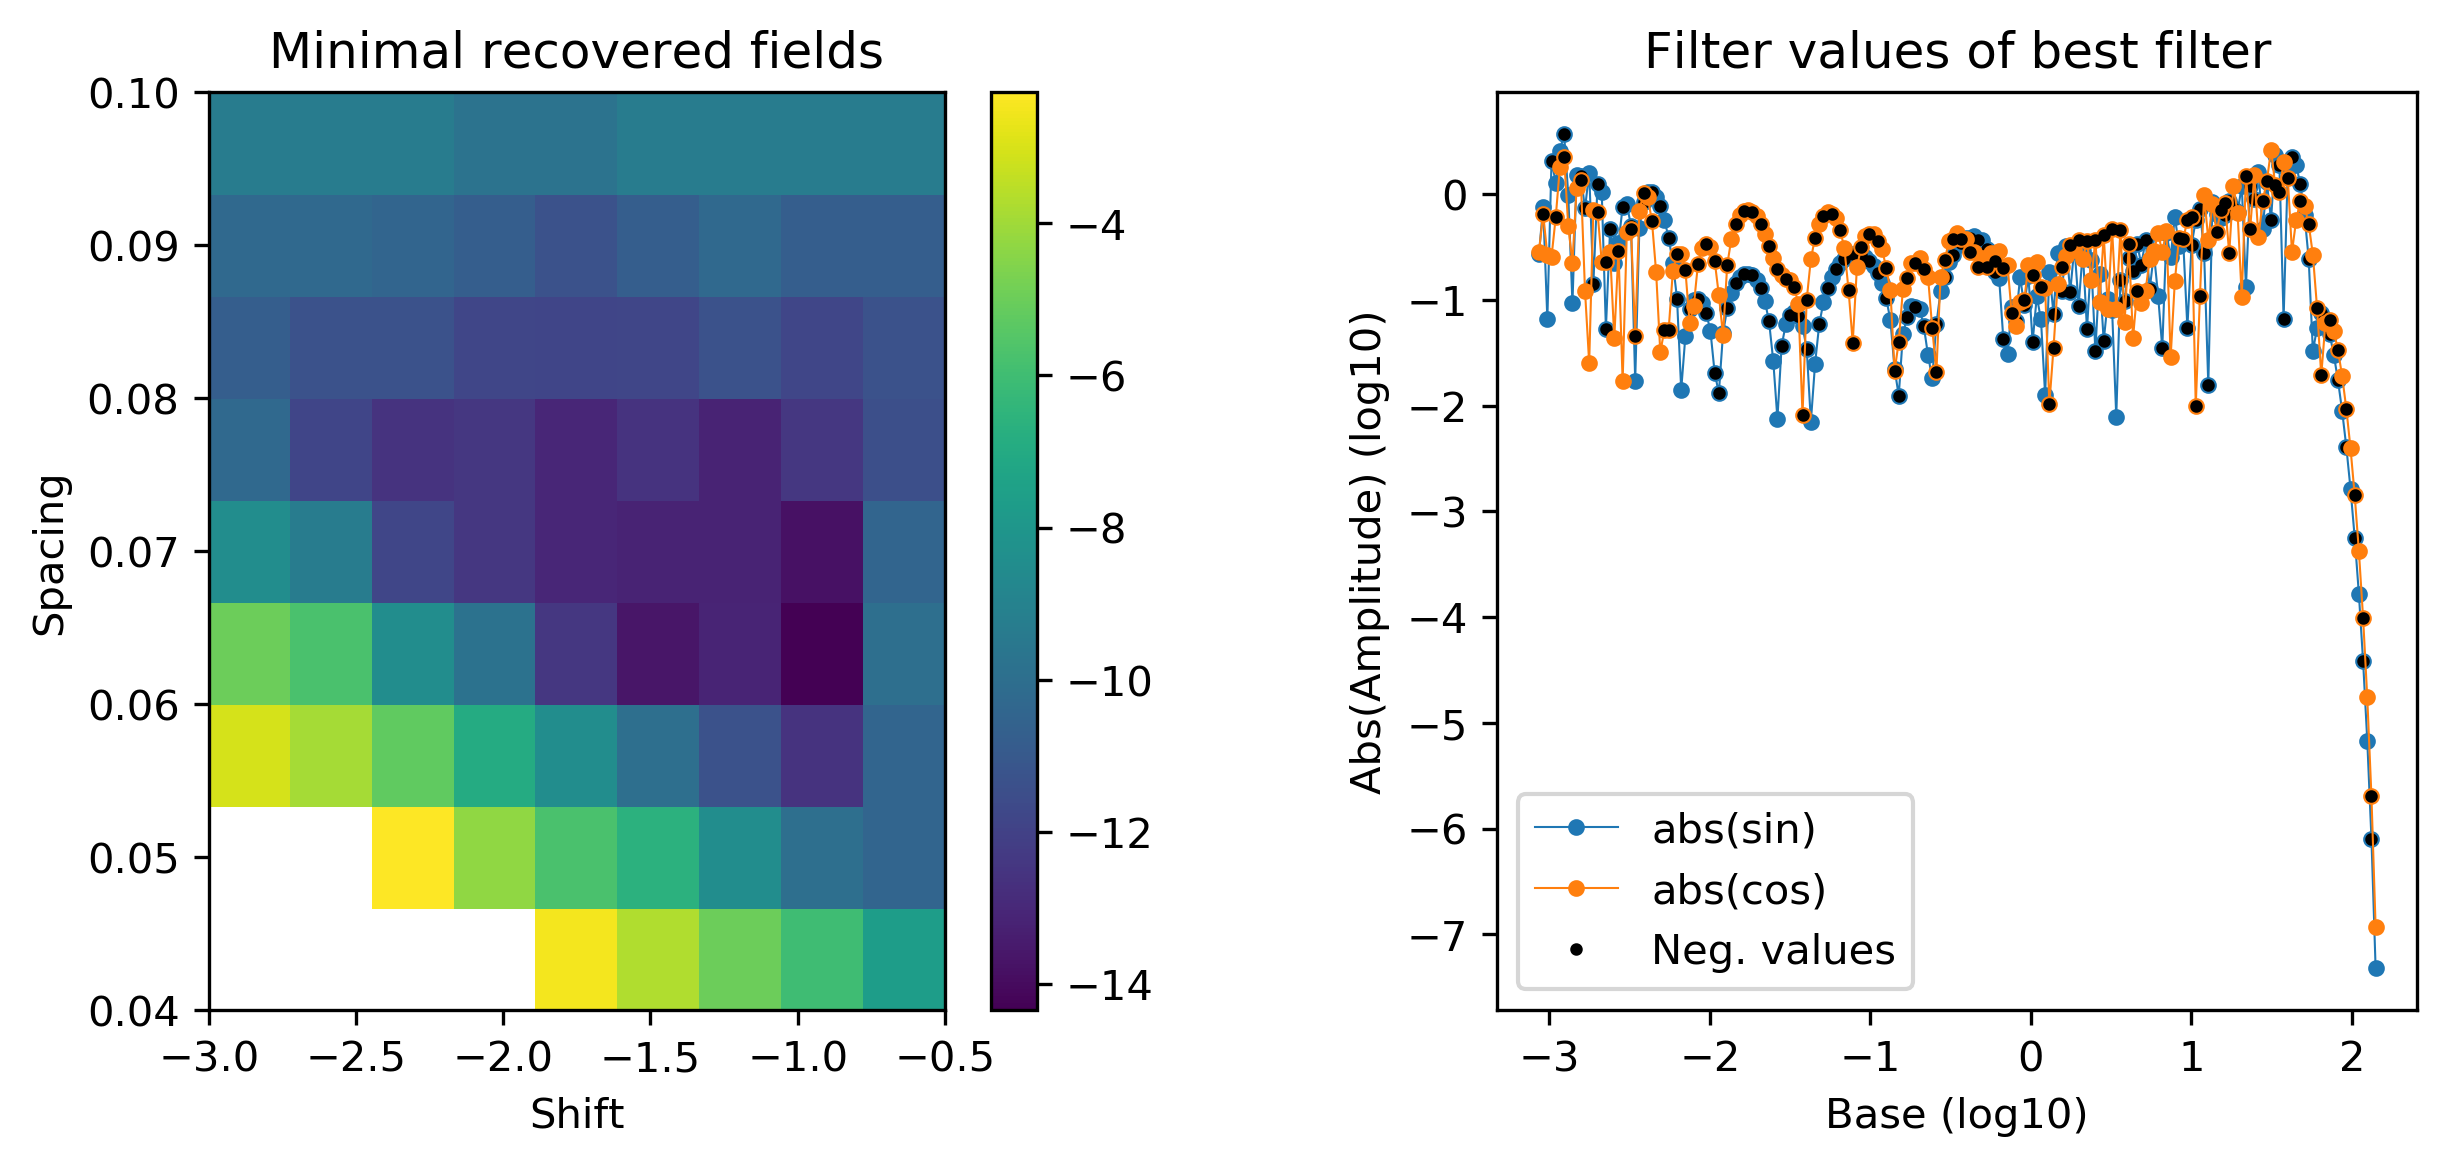

In [5]:
filt2, out2 = epm.fdesign.design(spacing=(0.04, 0.1, 10), shift=(-3, -0.5, 10), save=False, **inp)

## 3. Final focus

   brute fct calls : 100    
   fmin  fct calls : 208

   Filter length   : 201
   Best filter
   > Min field     : 3.70408e-15
   > Spacing       : 0.06000070232
   > Shift         : -1.027777778
   > Base min/max  : 8.868382e-04 / 1.443574e+02

:: empymod END; runtime = 0:00:06.801075 :: 

* QC: Overview of brute-force inversion:


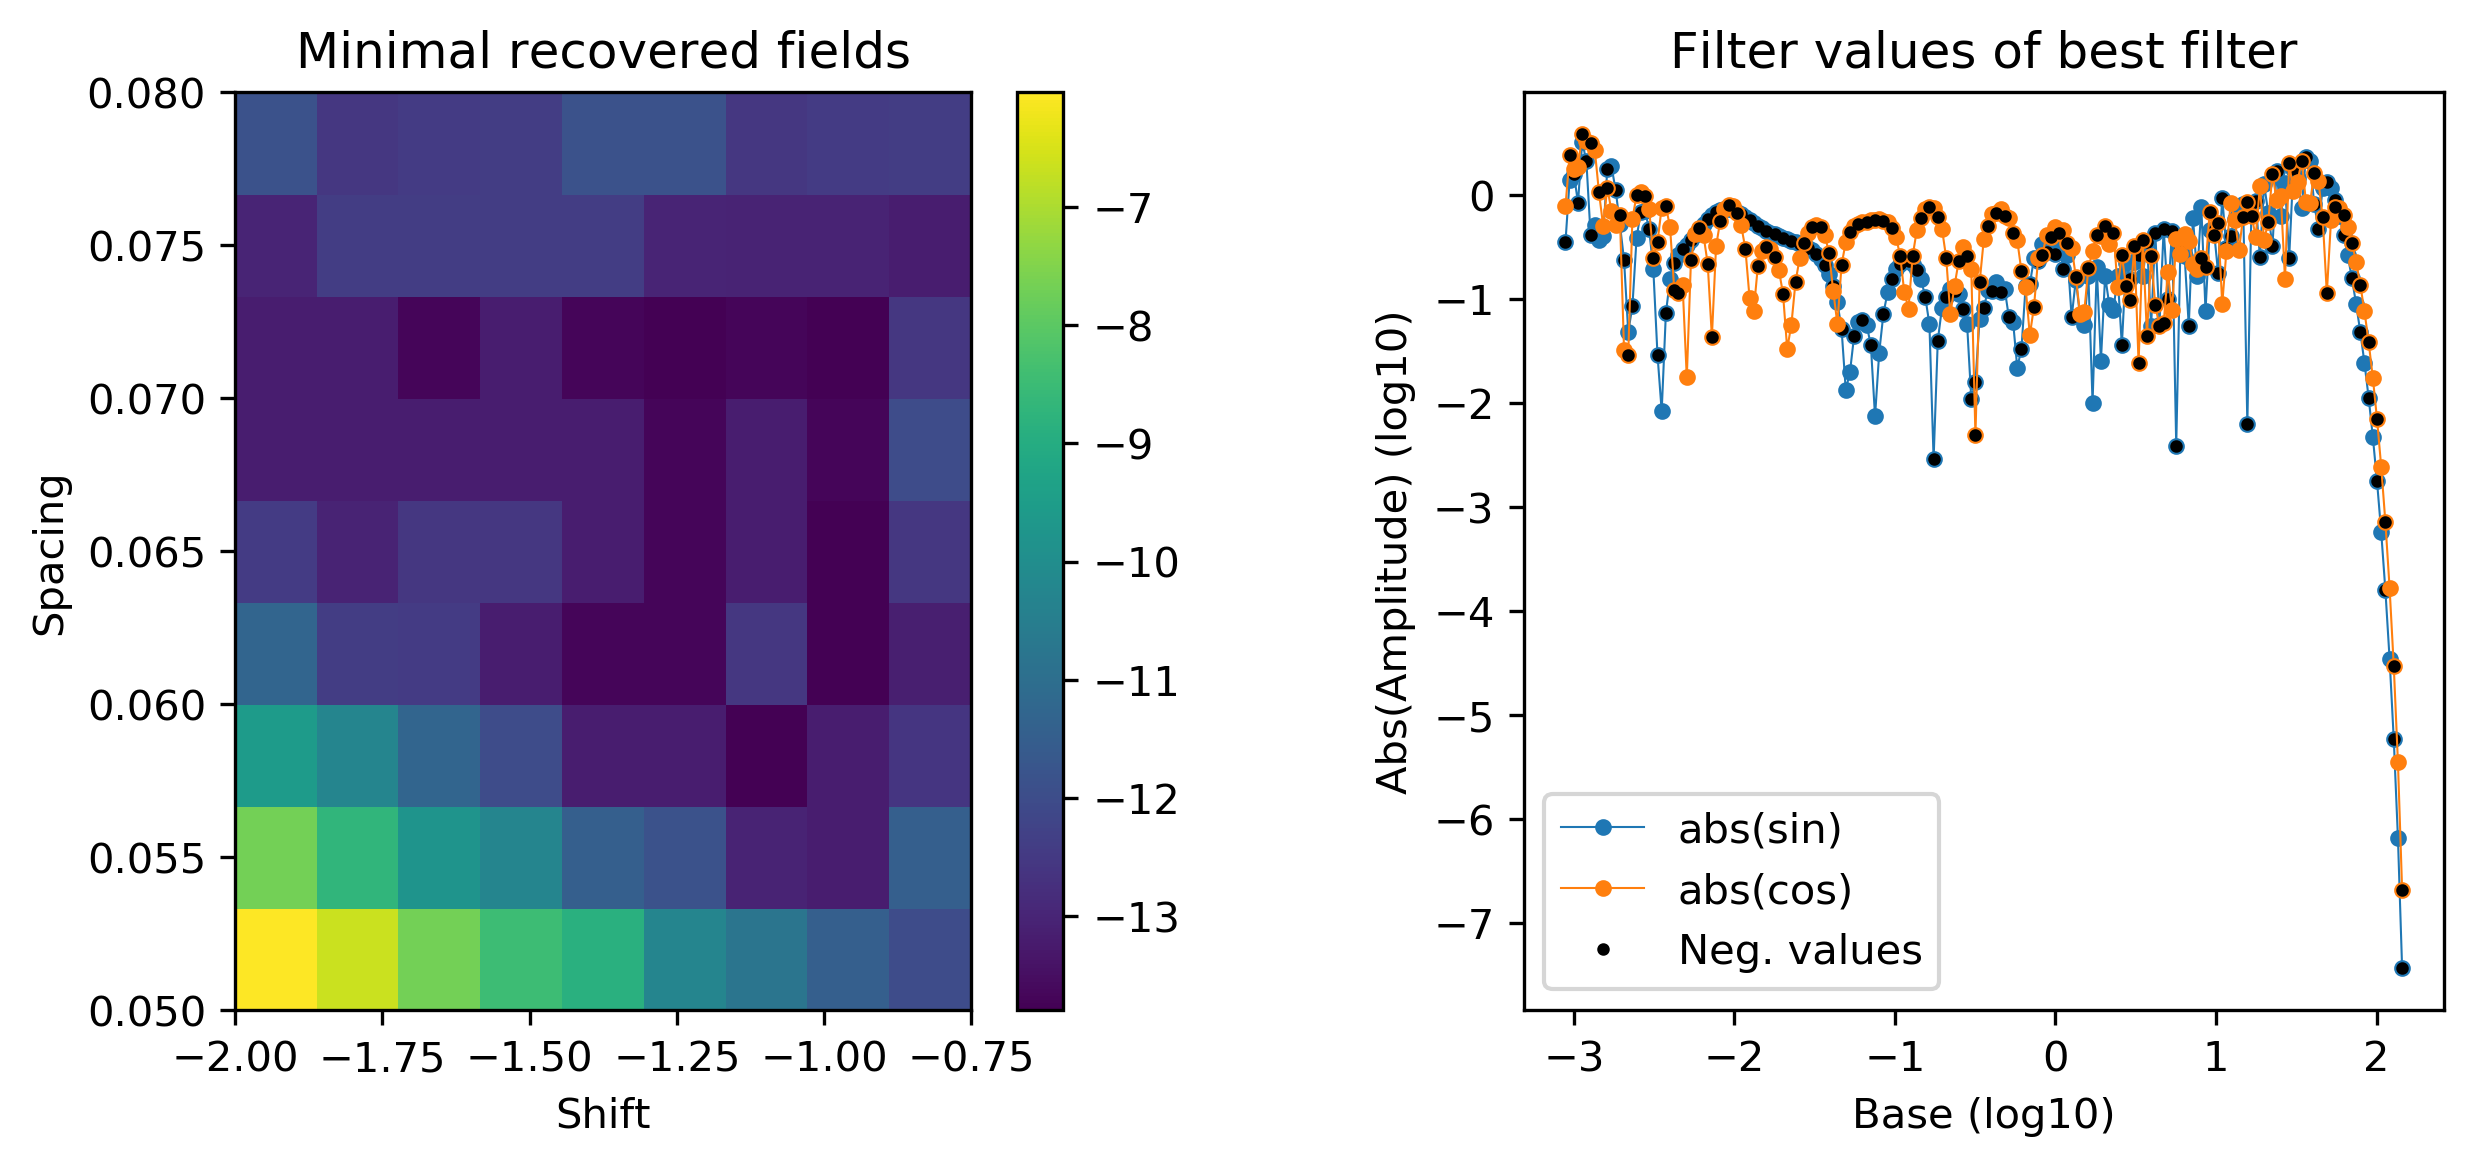

In [6]:
filt, out = epm.fdesign.design(spacing=(0.05, 0.08, 10), shift=(-2, -0.75, 10), finish=True, save=False, **inp)

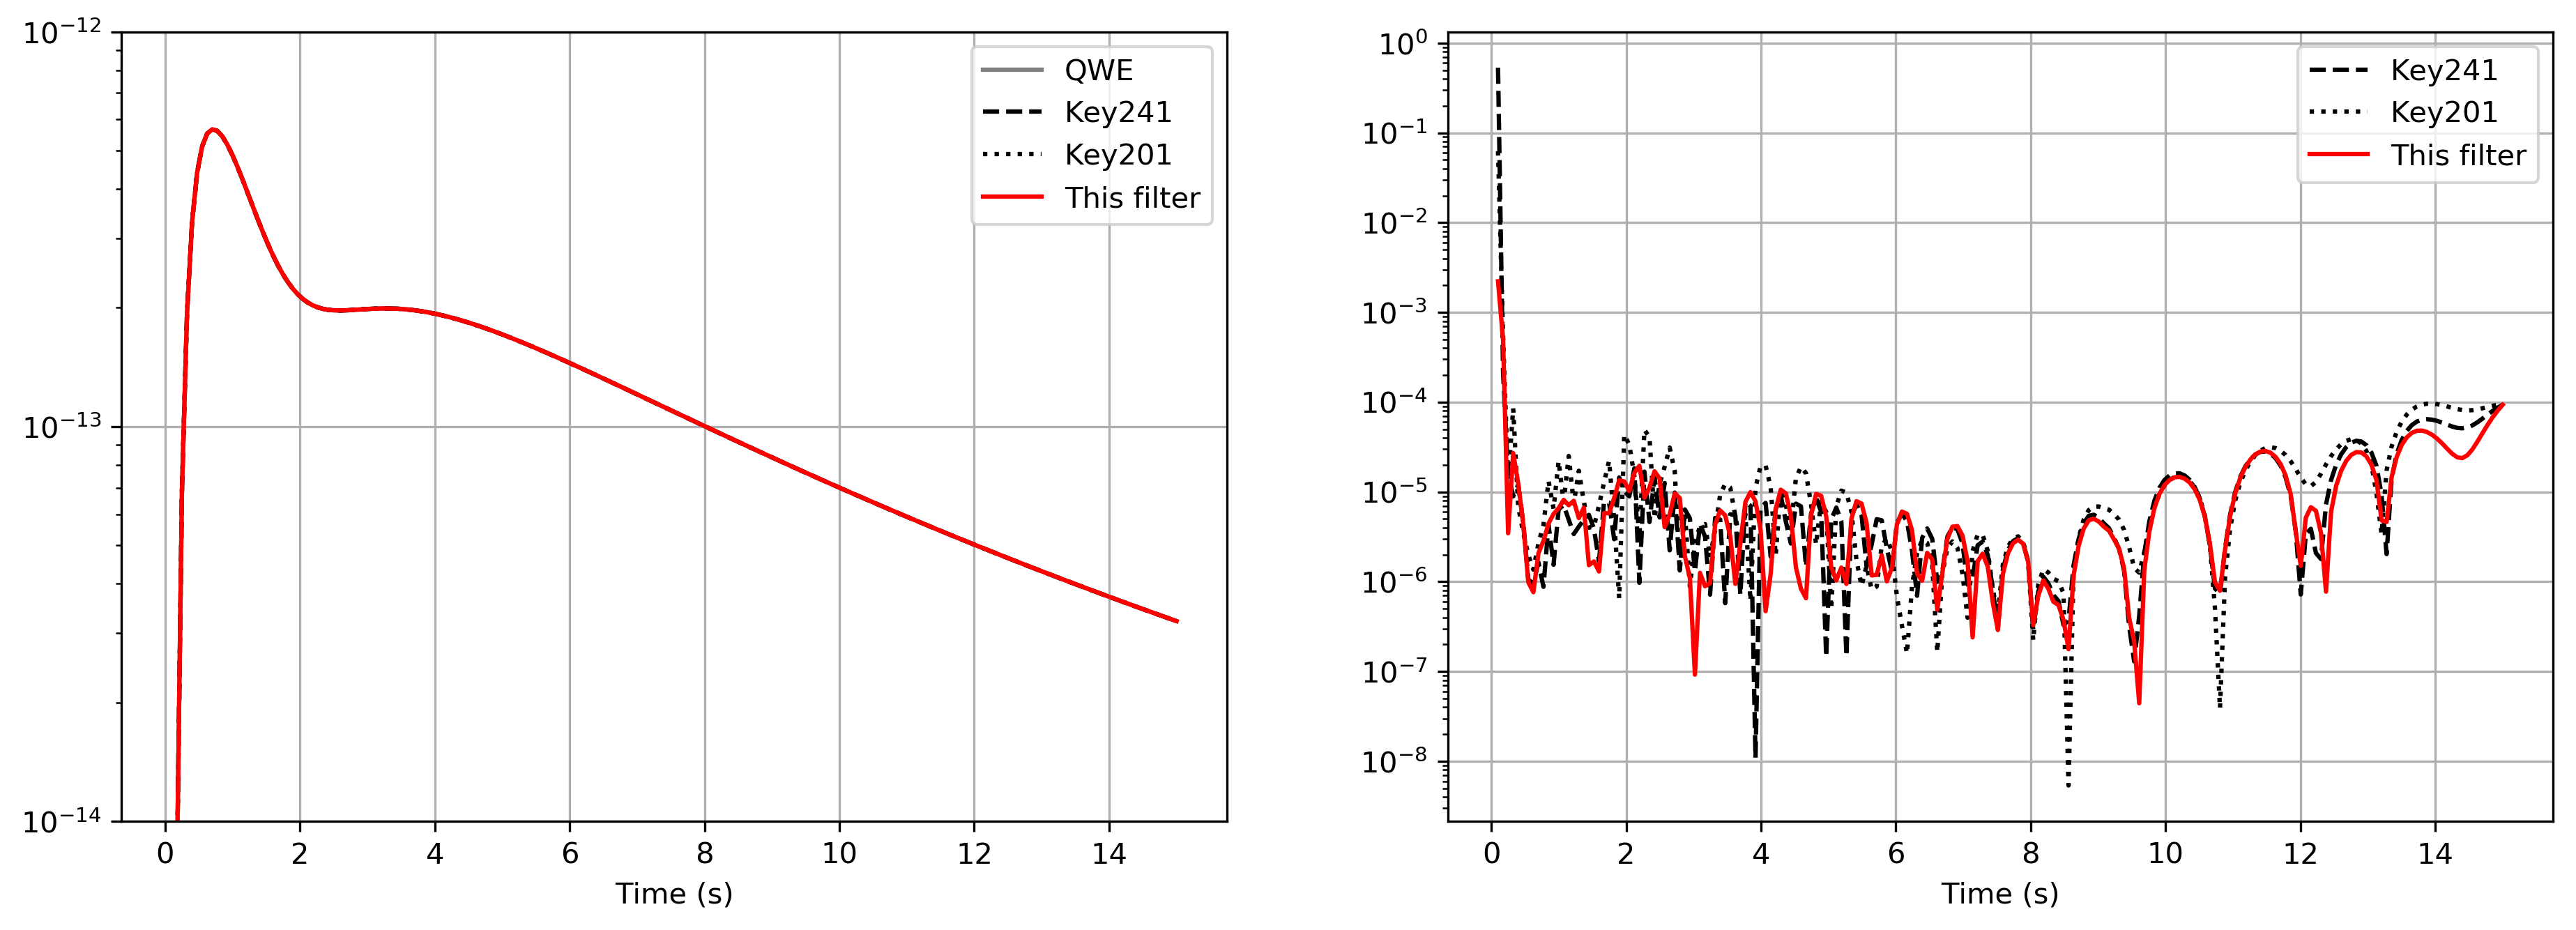

In [7]:
t = np.linspace(0.1, 15, 200)
inp = {
    'src': [0, 0, 990],
    'rec': [4000, 0, 1000], 
    'depth': [0, 1000, 2000, 2100],
    'res': [1e14, 0.3, 1, 100, 1],
    'ab': 11,
    'freqtime': t,
    'signal': 0,
    'verb': 1,
}

key241 = epm.dipole(ftarg='key_241_CosSin_2009', **inp)
key201 = epm.dipole(ftarg='key_201_CosSin_2012', **inp)
test = epm.dipole(ftarg=filt, **inp)
qwe = epm.dipole(ft='qwe', **inp)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.grid(True)
plt.semilogy(t, np.abs(qwe), c='0.5', label='QWE')
plt.semilogy(t, np.abs(key241), 'k--', label='Key241')
plt.semilogy(t, np.abs(key201), 'k:', label='Key201')
plt.semilogy(t, np.abs(test), 'r', label='This filter')
plt.legend()
plt.xlabel('Time (s)')
plt.ylim([1e-14, 1e-12])

plt.subplot(122)
plt.grid(True)
plt.semilogy(t, np.abs((key241-qwe)/qwe), 'k--', label='Key241')
plt.semilogy(t, np.abs((key201-qwe)/qwe), 'k:', label='Key201')
plt.semilogy(t, np.abs((test-qwe)/qwe), 'r', label='This filter')
plt.legend()
plt.xlabel('Time (s)')

plt.show()

In [8]:
epm.versions('HTML')